1. DATA EXPLORATION & PREPROCESSING

In [2]:
pip install ucimlrepo

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

In [4]:
# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

In [5]:
# Print feature data
X.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


In [7]:
# Summary statistics
X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
# Print target data
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [9]:
# Create class count
y['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

Text(0.5, 1.0, 'Begnin vs Malignant Count')

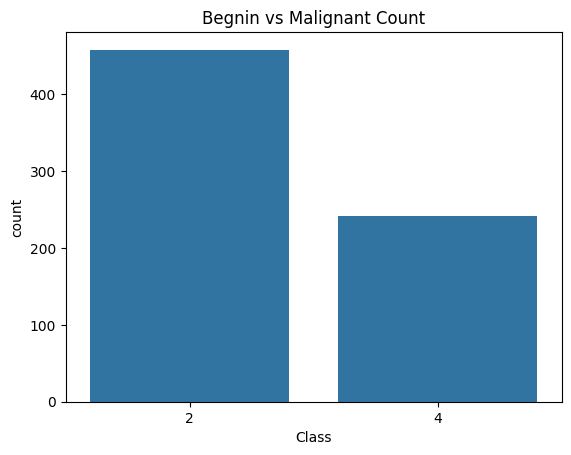

In [11]:
# Create a countplot
sns.countplot(x='Class', data=y)
plt.title('Begnin vs Malignant Count')

In [12]:
count_benign = len(y[y['Class']==2])
count_malignant = len(y[y['Class']==4])

pct_benign = count_benign / (count_benign + count_malignant)
pct_malignant = count_malignant / (count_benign + count_malignant)

print('Percentage of benign cancer:', pct_benign * 100)
print('Percentage of malignant cancer:', pct_malignant * 100)

Percentage of benign cancer: 65.52217453505007
Percentage of malignant cancer: 34.47782546494993


In [13]:
# Handle missing values
if pd.DataFrame(X).isnull().values.any():
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. NAIVE BAYES CLASSIFIER (Gaussian)

In [16]:
# Train the Naive Bayes classifier on the training data
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [17]:
# Evaluate the classifier on the testing data
nb_pred = naive_bayes_classifier.predict(X_test)

In [33]:
# Analyze the performance metrics
accuracy = accuracy_score(y_test, nb_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, nb_pred))

Accuracy: 0.9642857142857143

Classification Report:
               precision    recall  f1-score   support

           2       0.99      0.96      0.97        95
           4       0.92      0.98      0.95        45

    accuracy                           0.96       140
   macro avg       0.95      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140



Confusion Matrix:
 [[91  4]
 [ 1 44]]


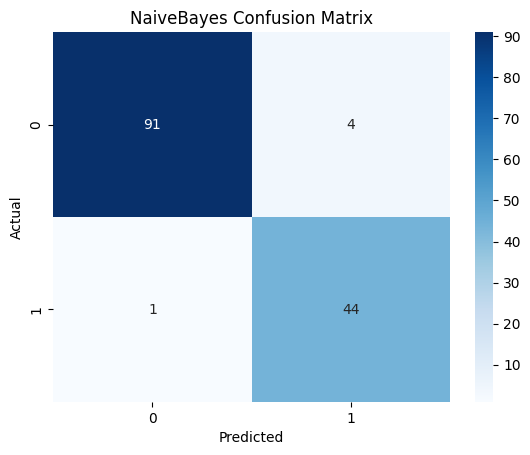

In [41]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, nb_pred)
print('Confusion Matrix:\n', conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('NaiveBayes Confusion Matrix')
plt.show()

ROC AUC Score: 0.9678362573099415


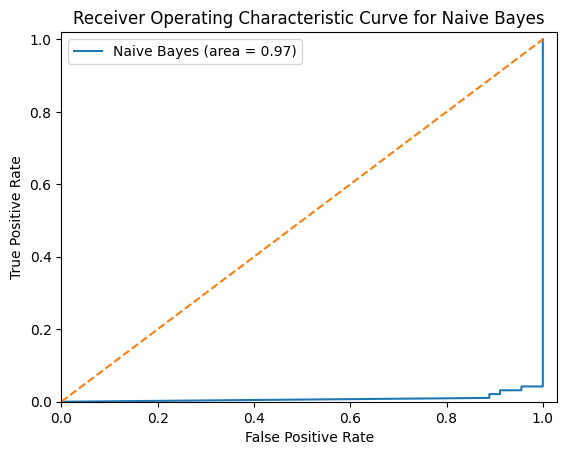

In [42]:
# Compute ROC AUC score for Naive Bayes classifier
nb_roc_auc = roc_auc_score(y_test, nb_pred)
print('ROC AUC Score:', nb_roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes_classifier.predict_proba(X_test)[:,1], pos_label=2)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0.0, 1.03])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Naive Bayes')
plt.legend(loc='upper left')
plt.show()

3. DECISION TREE CLASSIFIER

In [36]:
# Train the Decision Tree classifier on the training data
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# Evaluate the classifier on the testing data
dt_pred = dtree.predict(X_test)

In [38]:
# Analyze the performance metrics
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, dt_pred))

Accuracy: 0.9571428571428572

Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.98      0.97        95
           4       0.95      0.91      0.93        45

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



Confusion Matrix:
 [[93  2]
 [ 4 41]]


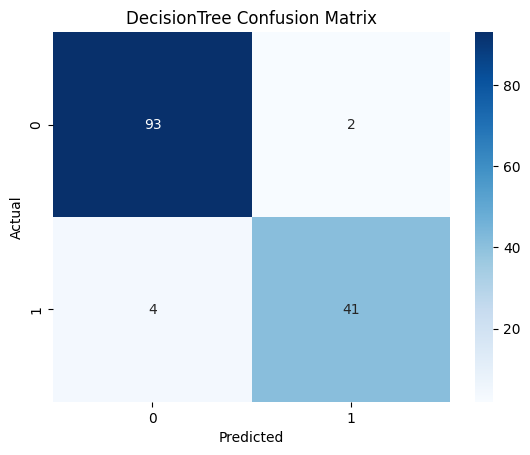

In [39]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, dt_pred)
print('Confusion Matrix:\n', conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('DecisionTree Confusion Matrix')
plt.show()

ROC AUC Score: 0.9450292397660819


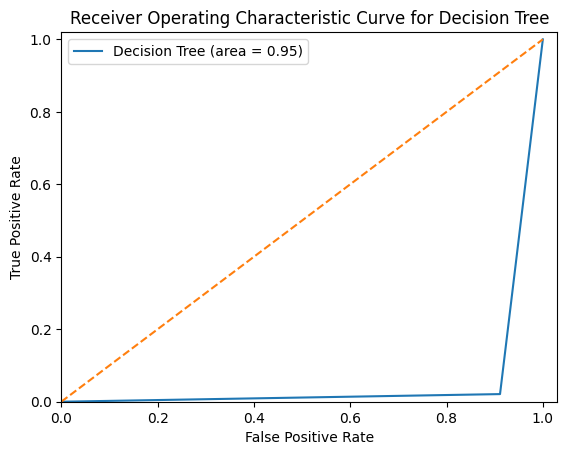

In [40]:
# Compute ROC AUC score for decision tree classifier
dtree_roc_auc = roc_auc_score(y_test, dt_pred)
print('ROC AUC Score:', dtree_roc_auc)

# Compute ROC curve for decision tree classifier
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1], pos_label=2)

# Plot ROC curve for decision tree classifier
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0.0, 1.03])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Decision Tree')
plt.legend(loc='upper left')
plt.show()

4. RANDOM FOREST CLASSIFIER

In [26]:
# Train the Random Forest classifier on the training data
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

<ipython-input-26-9ccca6a0428a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [27]:
# Evaluate the classifier on the testing data
rf_pred = rf.predict(X_test)

In [28]:
# Analyze the performance metrics
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Accuracy: 0.9642857142857143

Classification Report:
               precision    recall  f1-score   support

           2       0.97      0.98      0.97        95
           4       0.95      0.93      0.94        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



Confusion Matrix:
 [[93  2]
 [ 3 42]]


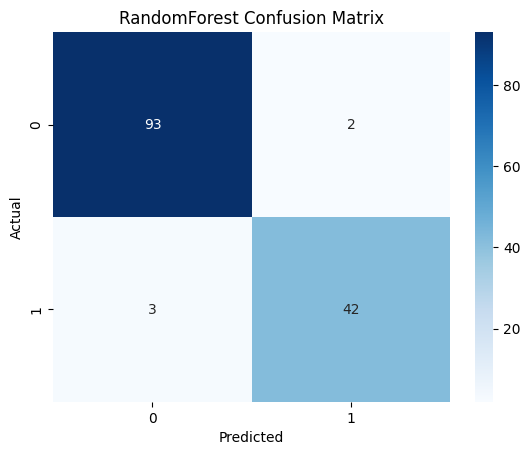

In [30]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
print('Confusion Matrix:\n', conf_matrix)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForest Confusion Matrix')
plt.show()

ROU AUC Score: 0.956140350877193


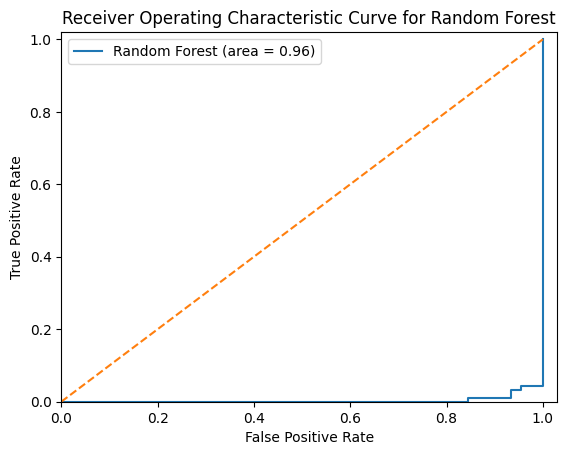

In [31]:
# Compute ROC AUC score for Random Forest classifier
rf_roc_auc = roc_auc_score(y_test, rf_pred)
print('ROU AUC Score:', rf_roc_auc)

# Compute ROC curve for Random Forest classifier
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label=2)

# Plot ROC curve for Random Forest classifier
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0.0, 1.03])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Random Forest')
plt.legend(loc='upper left')
plt.show()